In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import gensim.downloader as api
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Current work
print(os.getcwd())
# Change directory 2 level up
os.chdir("..")
os.chdir("..")
os.chdir("..")
print(os.getcwd())
# Look for the file in the directory
print(os.listdir())

/tmp/ipykernel_6531/3175463918.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


/home/jose/Git/SE-AP/experiments/experiment_2/notebooks
/home/jose/Git/SE-AP
['models', 'todo.md', '.pre-commit-config.yaml', 'demos', '.gitignore', 'experiments', 'include', '.git', '.env', 'README.md', '.env-example', 'LICENSE', 'model_technique_pathology_scores.csv']


In [2]:
model = "gpt-3.5-turbo"
prompt_technique = "chain"
temperature = 0.7
embedding_size = "cosine"

In [3]:
data = pd.read_csv(f'experiments/experiment_2/results_with_distances/{model}/results_with_distances_{prompt_technique}_{model}_{temperature}_{embedding_size}.csv')
data[data['Iteration'] == 1]

,Induced Pathology,Category,Surveyed Word,Related 1,Related 2,Related 3,Related 4,Related 5,Related 6,Related 7,...,Sequential Distance 3,Sequential Distance 4,Sequential Distance 5,Sequential Distance 6,Sequential Distance 7,Sequential Distance 8,Sequential Distance 9,Sequential Distance 10,Average Sequential Distance,STD Sequential Distance
0,No Pathology,Concrete,house,cozy,inviting,spacious,organized,clean,comfortable,welcoming,...,0.437422,0.232731,0.406384,0.321322,0.333265,0.333252,0.240297,0.312554,0.335156,0.067364
1,No Pathology,Concrete,car,reliable,efficient,sleek,stylish,well-maintained,comfortable,modern,...,0.229587,0.269160,0.209224,0.282820,0.261270,0.262979,0.226880,0.358481,0.273572,0.047501
2,No Pathology,Concrete,coat,warm,fashionable,stylish,comfortable,well fitted,versatile,durable,...,0.356000,0.291937,NaN,0.301574,0.381952,0.309638,0.265281,0.314448,0.339267,NaN
3,No Pathology,Concrete,necklace,beautiful,elegant,delicate,eye-catching,stylish,meaningful,timeless,...,0.398287,0.394335,0.384841,0.140565,0.358180,0.349376,0.106179,0.318242,0.326645,0.111229
4,No Pathology,Concrete,sofa,comfortable,plush,spacious,stylish,supportive,cozy,inviting,...,0.463617,0.419565,0.171258,0.500027,0.360445,0.235747,0.077535,0.385257,0.356614,0.146362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Social Anxiety,Abstract,insecurity,self-doubt,uncertainty,fear,vulnerability,anxiety,instability,doubt,...,0.613196,0.585519,0.546039,0.612597,0.344941,0.490726,NaN,0.618700,0.562040,NaN
1596,Social Anxiety,Abstract,indifference,apathy,unconcern,disinterest,detachment,passivity,disregard,nonchalance,...,0.767966,0.428169,0.681293,0.708560,0.630588,0.623055,0.653948,0.447815,0.637931,0.122609
1597,Social Anxiety,Abstract,infidelity,betrayal,unfaithfulness,adultery,disloyalty,treachery,cheating,deceit,...,0.740636,0.500013,0.538686,0.622774,0.552294,0.540681,0.282035,0.516115,0.563339,0.127338
1598,Social Anxiety,Abstract,aggressiveness,hostility,belligerence,aggression,combativeness,confrontational,antagonism,violence,...,0.709105,0.619493,0.449212,0.440734,0.324284,0.632257,0.449824,0.522039,0.533036,0.116287


In [4]:
grouped_stats = data.groupby('Induced Pathology').agg({
    'Average Sequential Distance': ['mean', 'std'],
    'STD Sequential Distance': ['mean', 'std']
}).reset_index()
grouped_stats

Induced Pathology Average Sequential Distance            \
                                                        mean       std   
0              Alcohol Addiction                    0.355486  0.148454   
1                         Apathy                    0.237917  0.172246   
2                     Depression                    0.275595  0.141278   
3                Eating Disorder                    0.289956  0.122262   
4                    Impulsivity                    0.332441  0.148591   
5                   No Pathology                    0.399156  0.103394   
6  Obsessive Compulsive Disorder                    0.336340  0.138668   
7                  Schizophrenia                    0.312400  0.147908   
8                 Social Anxiety                    0.322217  0.146825   
9                  Trait Anxiety                    0.363453  0.127393   

  STD Sequential Distance            
                     mean       std  
0                0.106895  0.036820  
1                0.098673  0.043713  
2                0.105621  0.035951  
3                0.107618  0.036550  
4                0.118195  0.050709  
5                0.114970  0.038235  
6                0.120847  0.039813  
7                0.105469  0.038421  
8                0.109529  0.038323  
9                0.119760  0.040151

In [5]:

pathologies_induced = [
    "No Pathology",
    "Depression",
    "Trait Anxiety",
    "Eating Disorder",
    "Alcohol Addiction",
    "Impulsivity",
    "Schizophrenia",
    "Obsessive Compulsive Disorder",
    "Apathy",
    "Social Anxiety",
]

grouped_stats['Induced Pathology'] = pd.Categorical(grouped_stats['Induced Pathology'],
                                                     categories=pathologies_induced,
                                                     ordered=True)

grouped_stats_sorted = grouped_stats.sort_values('Induced Pathology')

grouped_stats_sorted


Induced Pathology Average Sequential Distance            \
                                                        mean       std   
5                   No Pathology                    0.399156  0.103394   
2                     Depression                    0.275595  0.141278   
9                  Trait Anxiety                    0.363453  0.127393   
3                Eating Disorder                    0.289956  0.122262   
0              Alcohol Addiction                    0.355486  0.148454   
4                    Impulsivity                    0.332441  0.148591   
7                  Schizophrenia                    0.312400  0.147908   
6  Obsessive Compulsive Disorder                    0.336340  0.138668   
1                         Apathy                    0.237917  0.172246   
8                 Social Anxiety                    0.322217  0.146825   

  STD Sequential Distance            
                     mean       std  
5                0.114970  0.038235  
2                0.105621  0.035951  
9                0.119760  0.040151  
3                0.107618  0.036550  
0                0.106895  0.036820  
4                0.118195  0.050709  
7                0.105469  0.038421  
6                0.120847  0.039813  
1                0.098673  0.043713  
8                0.109529  0.038323

In [6]:
# Extracción de los nombres de las patologías
pathologies = grouped_stats_sorted['Induced Pathology']

# Datos para el primer gráfico (Promedio de la distancia secuencial)
average_means = grouped_stats_sorted['Average Sequential Distance']['mean']
average_stds = grouped_stats_sorted['Average Sequential Distance']['std']

# Datos para el segundo gráfico (Desviación estándar de la distancia secuencial)
std_means = grouped_stats_sorted['STD Sequential Distance']['mean']
std_stds = grouped_stats_sorted['STD Sequential Distance']['std']

mean_no_pathology_average = average_means[5]
mean_no_pathology_std = std_means[5]

grouped_stats_sorted

Induced Pathology Average Sequential Distance            \
                                                        mean       std   
5                   No Pathology                    0.399156  0.103394   
2                     Depression                    0.275595  0.141278   
9                  Trait Anxiety                    0.363453  0.127393   
3                Eating Disorder                    0.289956  0.122262   
0              Alcohol Addiction                    0.355486  0.148454   
4                    Impulsivity                    0.332441  0.148591   
7                  Schizophrenia                    0.312400  0.147908   
6  Obsessive Compulsive Disorder                    0.336340  0.138668   
1                         Apathy                    0.237917  0.172246   
8                 Social Anxiety                    0.322217  0.146825   

  STD Sequential Distance            
                     mean       std  
5                0.114970  0.038235  
2                0.105621  0.035951  
9                0.119760  0.040151  
3                0.107618  0.036550  
0                0.106895  0.036820  
4                0.118195  0.050709  
7                0.105469  0.038421  
6                0.120847  0.039813  
1                0.098673  0.043713  
8                0.109529  0.038323

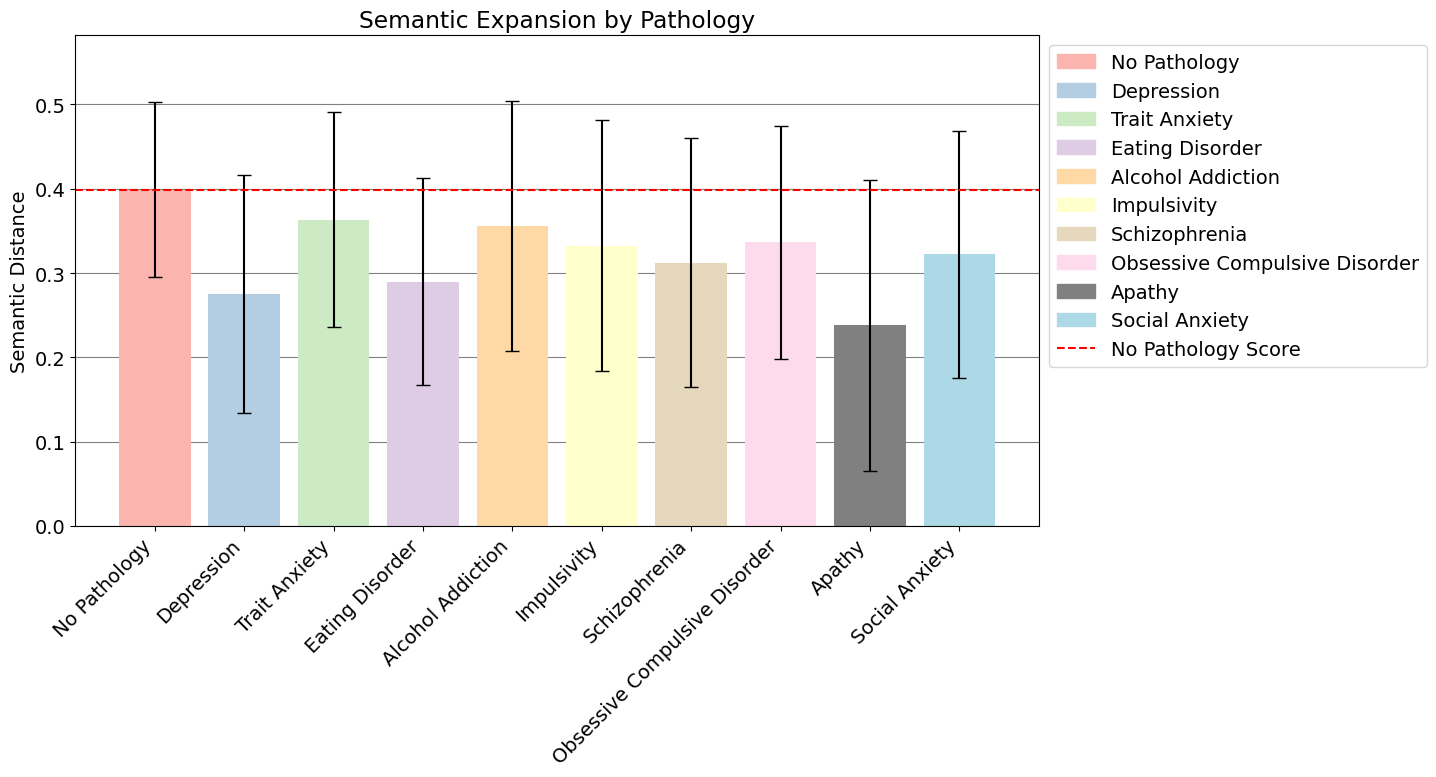

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

pastel = plt.get_cmap('Pastel1')
num_pathologies = len(pathologies)
colors = [pastel.colors[i % len(pastel.colors)] for i in range(num_pathologies)]
pathologies_list = pathologies.tolist()

try:
    apathy_index = pathologies_list.index('Apathy')
    colors[apathy_index] = 'gray'
    social_anxiety_index = pathologies_list.index('Social Anxiety')
    colors[social_anxiety_index] = 'lightblue'
except ValueError:
    pass

# Configuración de los tamaños de fuente
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
bars = ax.bar(pathologies, average_means, yerr=average_stds, color=colors, capsize=5)
ax.axhline(y=mean_no_pathology_average, color='r', linestyle='--', label='Mean No Pathology')
ax.set_title('Semantic Expansion by Pathology')
ax.set_ylabel('Semantic Distance')
ax.set_xticks(np.arange(len(pathologies)))
ax.set_xticklabels(pathologies, rotation=45, ha='right')
ax.set_facecolor('white') 
ax.set_ylim(0, ax.get_ylim()[1] * 1.1)
ax.grid(which='major', axis='y', linestyle='-', linewidth=0.8, color='grey')  
ax.set_axisbelow(True)

legend_patches = [mpatches.Patch(color=color, label=pathology) for pathology, color in zip(pathologies, colors)]
mean_no_pathology_line = mlines.Line2D([], [], color='red', linestyle='--', label='No Pathology Score')

plt.legend(handles=legend_patches + [mean_no_pathology_line], loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.subplots_adjust(right=0.75) 
plt.show()

# plt.figure(figsize=(14, 8))
# ax = plt.subplot(111)
# bars = ax.bar(pathologies, std_means, yerr=std_stds, color=colors, capsize=5)
# ax.axhline(y=mean_no_pathology_std, color='r', linestyle='--', label='Mean No Pathology')
# ax.set_title('Semantic Expansion by Pathology')
# ax.set_ylabel('Semantic Distance')
# ax.set_xticks(np.arange(len(pathologies)))
# ax.set_xticklabels(pathologies, rotation=45, ha='right')
# ax.set_facecolor('white')
# ax.set_ylim(0, ax.get_ylim()[1] * 1.1) 
# ax.grid(which='major', axis='y', linestyle='-', linewidth=0.8, color='grey') 
# ax.set_axisbelow(True)
# plt.legend(handles=legend_patches + [mean_no_pathology_line], loc='upper left', bbox_to_anchor=(1, 1))
# plt.tight_layout()
# plt.subplots_adjust(right=0.75)
# plt.show()


In [8]:
grouped_stats = data.groupby(['Induced Pathology', 'Category']).agg({
    'Average Sequential Distance': ['mean', 'std'],
    'STD Sequential Distance': ['mean', 'std']
}).reset_index()

# Ordenar 'Induced Pathology' según el orden específico
grouped_stats['Induced Pathology'] = pd.Categorical(grouped_stats['Induced Pathology'],
                                                     categories=pathologies_induced,
                                                     ordered=True)

grouped_stats_sorted = grouped_stats.sort_values(by=['Induced Pathology', 'Category'])

grouped_stats_sorted


Induced Pathology  Category Average Sequential Distance  \
                                                                   mean   
10                   No Pathology  Abstract                    0.428759   
11                   No Pathology  Concrete                    0.369553   
4                      Depression  Abstract                    0.336426   
5                      Depression  Concrete                    0.214802   
18                  Trait Anxiety  Abstract                    0.380341   
19                  Trait Anxiety  Concrete                    0.346561   
6                 Eating Disorder  Abstract                    0.329285   
7                 Eating Disorder  Concrete                    0.250953   
0               Alcohol Addiction  Abstract                    0.381880   
1               Alcohol Addiction  Concrete                    0.329099   
8                     Impulsivity  Abstract                    0.322535   
9                     Impulsivity  Concrete                    0.342319   
14                  Schizophrenia  Abstract                    0.351472   
15                  Schizophrenia  Concrete                    0.273362   
12  Obsessive Compulsive Disorder  Abstract                    0.405331   
13  Obsessive Compulsive Disorder  Concrete                    0.267201   
2                          Apathy  Abstract                    0.273692   
3                          Apathy  Concrete                    0.202142   
16                 Social Anxiety  Abstract                    0.383928   
17                 Social Anxiety  Concrete                    0.260444   

             STD Sequential Distance            
         std                    mean       std  
10  0.101045                0.114819  0.037382  
11  0.097051                0.115136  0.039155  
4   0.138696                0.107348  0.035106  
5   0.115281                0.104081  0.036621  
18  0.131062                0.117424  0.037094  
19  0.121294                0.122092  0.042862  
6   0.117381                0.105874  0.035082  
7   0.114255                0.109395  0.037908  
0   0.137137                0.105274  0.033938  
1   0.154531                0.108623  0.039589  
8   0.155564                0.107407  0.049836  
9   0.140613                0.129921  0.049022  
14  0.144019                0.101936  0.036985  
15  0.141296                0.109135  0.039527  
12  0.120558                0.118077  0.036533  
13  0.119936                0.123754  0.042798  
2   0.171113                0.103361  0.041705  
3   0.165836                0.094483  0.045025  
16  0.132798                0.109848  0.035587  
17  0.133633                0.109217  0.040828

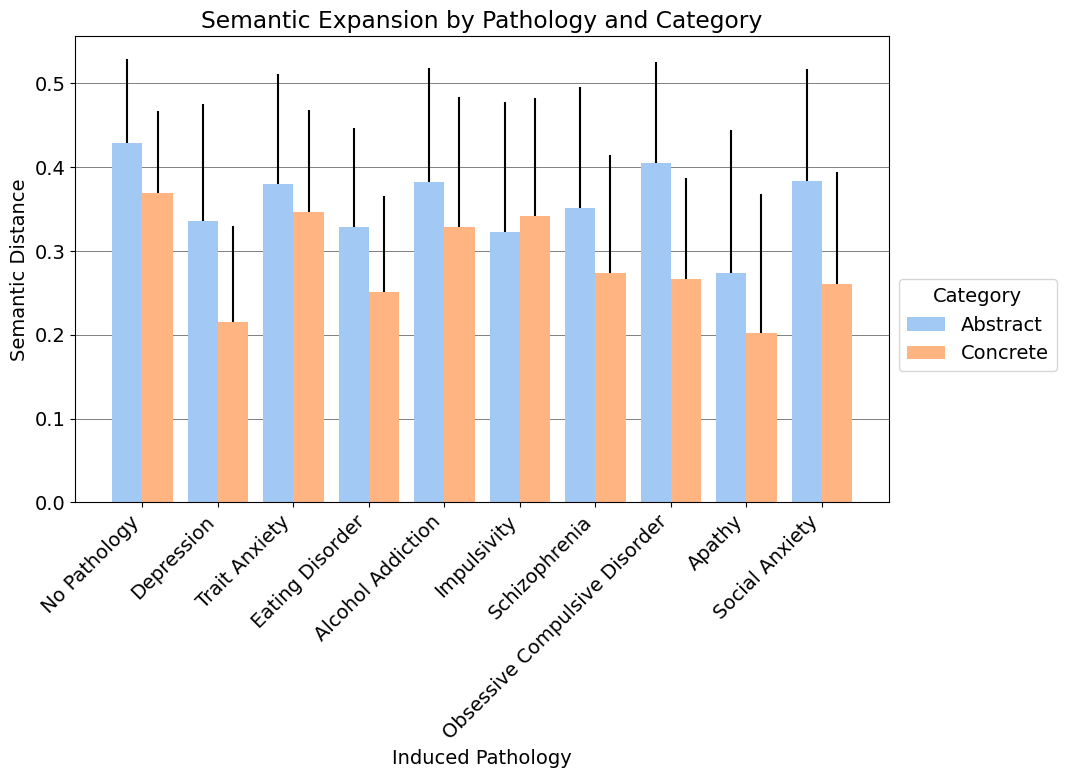

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

unique_pathologies = grouped_stats_sorted['Induced Pathology'].unique()
unique_categories = grouped_stats_sorted['Category'].unique()

# Usar una paleta de colores pastel de Seaborn
sns.set_palette("pastel")
category_colors = sns.color_palette("pastel", len(unique_categories))
color_map = dict(zip(unique_categories, category_colors))

color_map['P-C'] = '#808080'

# Configuraciones de las barras
n_categories = len(unique_categories)
bar_width = 0.8 / n_categories
index = np.arange(len(unique_pathologies))

# Crear el gráfico
fig, ax = plt.subplots(figsize=(12, 8))
ax.grid(color='gray', linestyle='-', linewidth=0.7, axis='y')
ax.set_axisbelow(True)
ax.xaxis.grid(False)
for i, category in enumerate(unique_categories):
    category_data = grouped_stats_sorted[grouped_stats_sorted['Category'] == category]
    
    positions = index + (i - n_categories / 2) * bar_width + bar_width / 2
    
    means = category_data['Average Sequential Distance']['mean']
    stds = category_data['Average Sequential Distance']['std']
    
    yerr = np.zeros((2, len(stds)))
    yerr[1, :] = stds
    
    ax.bar(positions, means, bar_width, yerr=yerr, color=color_map[category], label=category, capsize=0)

# Configurar las etiquetas y títulos del eje
ax.set_xlabel('Induced Pathology')
ax.set_ylabel('Semantic Distance')
ax.set_title('Semantic Expansion by Pathology and Category')
ax.set_xticks(index)
ax.set_xticklabels(unique_pathologies, rotation=45, ha="right")

ax.legend(title="Category", loc='upper left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.subplots_adjust(right=0.75)

plt.show()
